In [12]:
from IPython.display import HTML
def new_section(title):
    style = "text-align:center;background:#9999ff;padding:60px;color:#ffffff;font-size:2em;"
    return HTML('<div style="{}">{}</div>'.format(style, title))
new_section("")

This is a quick demo of how to run variant calling pipeline on a test dataset. The raw test dataset for this exercise can be found in:


```
/nfs/esnitkin/bin_group/variant_calling_bin/test_data
```

In [13]:
% ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_data/*_R1.fastq.gz

/nfs/esnitkin/bin_group/variant_calling_bin/test_data/MRSA_jail_100_R1.fastq.gz
/nfs/esnitkin/bin_group/variant_calling_bin/test_data/MRSA_jail_10_R1.fastq.gz
/nfs/esnitkin/bin_group/variant_calling_bin/test_data/MRSA_jail_1_R1.fastq.gz


Step 1: 

We will call variants on all sets of PE reads in test_data folder. The script will detect the file extension of fastq file, generate individual job for each sample in test_data folder and submit these cluster jobs. Make sure to provide upur own config file that contains your user specific PBS values and tool parameters.

In [12]:
! /nfs/esnitkin/bin_group/anaconda2/bin//python /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/variant_call.py -type PE -readsdir /nfs/esnitkin/bin_group/variant_calling_bin/test_data/ -outdir /nfs/esnitkin/bin_group/variant_calling_bin/test_output -analysis test_results -index MRSA_USA_300 -steps All -cluster parallel-cluster -config /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/config_ali

START: Variant Calling Pipeline
Generating cluster jobs in temporary directory /nfs/esnitkin/bin_group/variant_calling_bin/test_output//temp_jobs
Running Jobs in parallel-cluster mode
Submitting Job: qsub /nfs/esnitkin/bin_group/variant_calling_bin/test_output//temp_jobs/MRSA_jail_100.pbs
Submitting Job: qsub /nfs/esnitkin/bin_group/variant_calling_bin/test_output//temp_jobs/MRSA_jail_10.pbs
Submitting Job: qsub /nfs/esnitkin/bin_group/variant_calling_bin/test_output//temp_jobs/MRSA_jail_1.pbs
You can check the job status with: qstat -u USERNAME
Logs were recorded in file with extension log.txt in /nfs/esnitkin/bin_group/variant_calling_bin/test_output//Logs/variant_calling
Total Time taken: 0:00:00.271331
End: Variant calling Pipeline


Step 2: 

When all the submitted jobs are completed, you can move on to the next step of the analysis i.e core_prep. Run the same command with core_prep as your -steps argument

In [1]:
! /nfs/esnitkin/bin_group/anaconda2/bin//python /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/variant_call.py -type PE -readsdir /nfs/esnitkin/bin_group/variant_calling_bin/test_data/ -outdir /nfs/esnitkin/bin_group/variant_calling_bin/test_output -analysis test_results -index MRSA_USA_300 -steps core_prep -cluster parallel-cluster -config /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/config_ali

START: Extract core snps and generate diagnostic plots
Copying vcf files to /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/
Decompressing gzipped files in /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/
Running command: gzip -df /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/MRSA_jail_100_aln_mpileup_raw.vcf_5bp_indel_removed.vcf.gz
Running command: gzip -df /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/MRSA_jail_10_aln_mpileup_raw.vcf_5bp_indel_removed.vcf.gz
Running command: gzip -df /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/MRSA_jail_1_aln_mpileup_raw.vcf_5bp_indel_removed.vcf.gz
Running command: gzip -df /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/MRSA_jail_100_filter2_final.vcf.gz
Running command: gzip -df /nfs/esnitkin/bin_group/variant_calling_bin/test_output//core_temp_dir/MRSA_jail_10_filter2_final.vcf.gz
Running command: gzip

Step 3:

This step will take all the intermediate files generated during the core_prep step and generate the core SNPs and various diagnostics plot related data matrices.

In [2]:
! /nfs/esnitkin/bin_group/anaconda2/bin//python /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/variant_call.py -type PE -readsdir /nfs/esnitkin/bin_group/variant_calling_bin/test_data/ -outdir /nfs/esnitkin/bin_group/variant_calling_bin/test_output -analysis test_results -index MRSA_USA_300 -steps core -cluster parallel-cluster -config /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/config_ali

START: Extract core snps and generate diagnostic plots
Logs were recorded in file with extension log.txt in /nfs/esnitkin/bin_group/variant_calling_bin/test_output//Logs/core
Total Time taken: 0:12:02.726169


Step 4:
    
Generate the pipeline report and transfer the final results to a *_core_results folder arranged in a more organized manner.  

In [3]:
! /nfs/esnitkin/bin_group/anaconda2/bin//python /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/variant_call.py -type PE -readsdir /nfs/esnitkin/bin_group/variant_calling_bin/test_data/ -outdir /nfs/esnitkin/bin_group/variant_calling_bin/test_output -analysis test_results -index MRSA_USA_300 -steps report -cluster parallel-local -config /nfs/esnitkin/bin_group/pipeline/Github/variant_calling_pipeline/config_ali

START: Generating alignment and variant calling report
/nfs/esnitkin/bin_group/variant_calling_bin/test_output//2018_04_26_11_23_59_core_results
Logs were recorded in file with extension log.txt in /nfs/esnitkin/bin_group/variant_calling_bin/test_output//Logs/report
Total Time taken: 0:00:04.932519


All the final results and reports will be tranferred and arranged in:

/nfs/esnitkin/bin_group/variant_calling_bin/test_output//2018_04_26_11_23_59_core_results

In [5]:
! ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/

.
..
core_snp_consensus
data_matrix


In [6]:
! ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/core_snp_consensus/

.
..
consensus_ref_variant_positions
consensus_variant_positions
MRSA_jail_100_filter2_final.vcf_core.vcf.gz
MRSA_jail_10_filter2_final.vcf_core.vcf.gz
MRSA_jail_1_filter2_final.vcf_core.vcf.gz


core_snp_consensus folder will contain core variant vcf files and consesnsus variants in fasta format. consensus_ref_variant_positions will contain core variants as well as reference allele which can be used as an input for Gubbins. 
consensus_variant_positions will contain only core variants in fasta format that can be used for Beast and Fasttree analysis.

In [7]:
! ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/core_snp_consensus/consensus_ref_variant_positions

.
..
MRSA_jail_100.fa
MRSA_jail_10.fa
MRSA_jail_1.fa


In [8]:
! ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/core_snp_consensus/consensus_variant_positions

.
..
MRSA_jail_100_variants.fa
MRSA_jail_10_variants.fa
MRSA_jail_1_variants.fa
MRSA_USA_300_variants.fa


As the name suggests, data_matrix contains all the matrices that were used for generating the core variants and which can be used for plotting various diagnostics plots.

In [10]:
! ls -1a /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/data_matrix/

.
..
2018_04_26_11_22_59_step_1.log.txt
2018_04_26_11_24_09_step_2.log.txt
2018_04_26_11_47_10_step_3.log.txt
matrices
Reports
snpeff_reports


matrices contain all the diagnostic plot related data. Reports folder contain a concise variants report of variants found in each sample, alignments related information and SNP/Indel matrix. snpeff_reports contain annotation report generated by snpEFF.

Lets plot some diagnostics plots that can use to troubleshoot variant calling pipeline.


In [11]:
! module load R

In [17]:
%cd /nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/data_matrix/matrices/

/nfs/esnitkin/bin_group/variant_calling_bin/test_output/2018_04_26_11_23_59_core_results/data_matrix/matrices


In [44]:
! Rscript bargraph.R

null device 
          1 


This will generate a barplot.png file showing the distribution of each variant filters on the final variants.

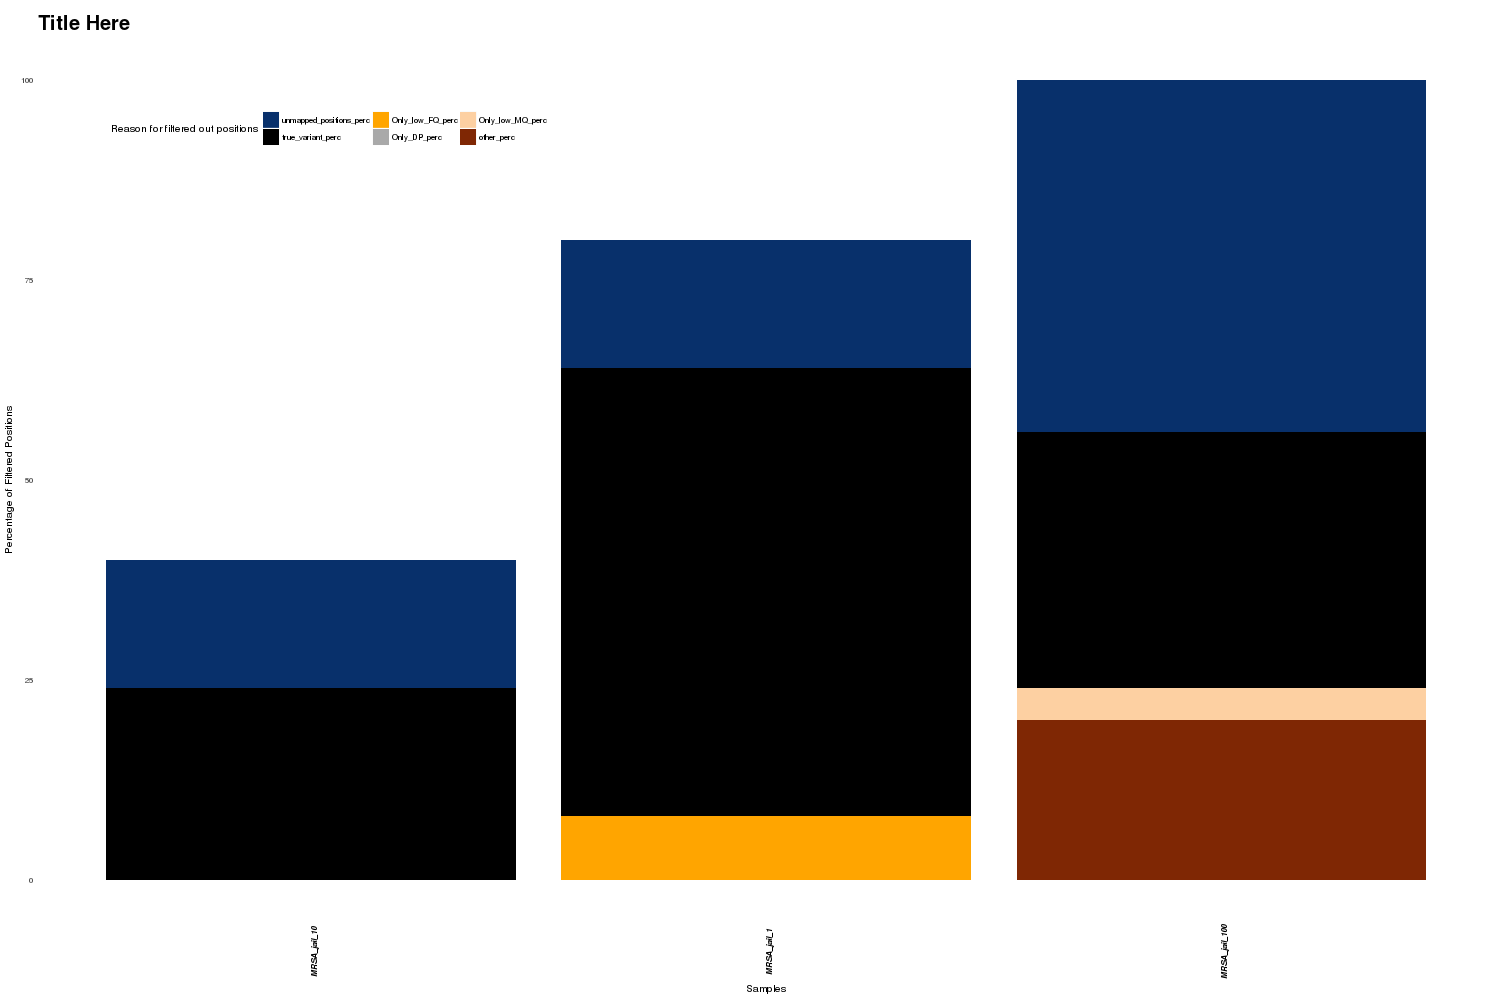

In [45]:
from IPython.display import Image
fig = Image(filename=('./barplot.png'))
fig